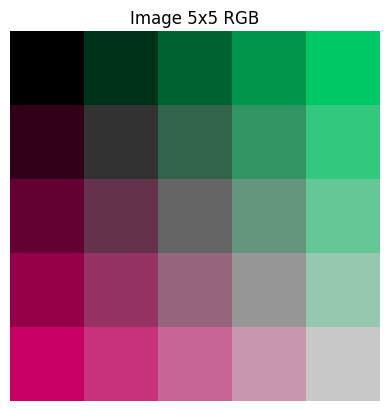

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Créer une image 5x5 avec 3 canaux (RGB)
# Chaque canal varie différemment pour visualiser facilement les couleurs

input_image = np.zeros((1, 5, 5, 3), dtype=np.float32)

for i in range(5):
    for j in range(5):
        input_image[0, i, j, 0] = i * 50    # rouge (varie selon la ligne)
        input_image[0, i, j, 1] = j * 50    # vert (varie selon la colonne)
        input_image[0, i, j, 2] = (i+j) * 25  # bleu (varie selon la somme i+j)

plt.imshow(input_image[0].astype(np.uint8))
plt.title("Image 5x5 RGB")
plt.axis('off')
plt.show()


In [ ]:
# input_image a la forme (1, 5, 5, 3)
# Extraire chaque canal séparément (on enlève la dimension batch)

image = input_image[0]  # forme (5, 5, 3)

print("Canal Rouge (0):")
print(image[:, :, 0])  # matrice 5x5 du canal rouge

print("\nCanal Vert (1):")
print(image[:, :, 1])  # matrice 5x5 du canal vert

print("\nCanal Bleu (2):")
print(image[:, :, 2])  # matrice 5x5 du canal bleu


Canal Rouge (0):
[[  0.   0.   0.   0.   0.]
 [ 50.  50.  50.  50.  50.]
 [100. 100. 100. 100. 100.]
 [150. 150. 150. 150. 150.]
 [200. 200. 200. 200. 200.]]

Canal Vert (1):
[[  0.  50. 100. 150. 200.]
 [  0.  50. 100. 150. 200.]
 [  0.  50. 100. 150. 200.]
 [  0.  50. 100. 150. 200.]
 [  0.  50. 100. 150. 200.]]

Canal Bleu (2):
[[  0.  25.  50.  75. 100.]
 [ 25.  50.  75. 100. 125.]
 [ 50.  75. 100. 125. 150.]
 [ 75. 100. 125. 150. 175.]
 [100. 125. 150. 175. 200.]]


les weights c'est exactement les filtres et les biais chaque filtre a 9 valeurs 3 channels avec 1 bias ca nous fait 28 parametres avec les deux filtres ca devient 56

In [ ]:
conv_layer = tf.keras.layers.Conv2D(
    filters=2,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='same',
    activation=None,
    use_bias=False,
)

conv_layer.build(input_shape=(1, 5, 5, 3))
# Appliquer convolution
output = conv_layer(input_image)
print("Output shape:", output.shape)
print("Feature map convoluée :\n", output.numpy()[0, :, :, 0])




# Récupérer les poids (filtres)
weights = conv_layer.get_weights()[0]
print("Shape des filtres :", weights.shape)
print("Valeurs des filtres :\n", weights)




Output shape: (1, 5, 5, 2)
Feature map convoluée :
 [[  33.145367   33.994587   50.68222    67.36985   -22.632833]
 [  35.984043   30.20064    32.842567   35.484543  -47.328915]
 [  31.685019    7.205696    9.847632   12.489568  -99.27664 ]
 [  27.385979  -15.789262  -13.147304  -10.505352 -151.22437 ]
 [ -55.652016 -136.51611  -133.82431  -131.1325   -202.24228 ]]
Shape des filtres : (3, 3, 3, 2)
Valeurs des filtres :
 [[[[-0.35382235 -0.3165397 ]
   [-0.31413472  0.12247044]
   [ 0.14577764  0.11115769]]

  [[-0.34932798 -0.1332674 ]
   [ 0.28774714 -0.31283695]
   [-0.3416533   0.03584865]]

  [[ 0.17452365  0.11691892]
   [-0.20287675 -0.26373005]
   [ 0.09257659  0.15939772]]]


 [[[-0.25884557  0.31905168]
   [ 0.09094363  0.15564466]
   [ 0.03784138  0.10837486]]

  [[-0.12915234 -0.27016053]
   [-0.2567478   0.18449277]
   [ 0.19704545  0.15801084]]

  [[-0.20078683 -0.09227878]
   [ 0.26207805 -0.06664416]
   [ 0.24206561 -0.35547733]]]


 [[[ 0.15466917  0.20197195]
   [ 0.36

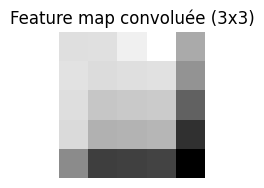

In [ ]:


# 4. Appliquer convolution
output = conv_layer(input_image)

# 5. Afficher la feature map convoluée (3x3)
plt.subplot(1, 3, 3)
plt.imshow(output.numpy()[0, :, :, 0], cmap='gray')
plt.title("Feature map convoluée (3x3)")
plt.axis('off')

plt.show()

In [ ]:
# 1. Define the max pooling layer
pool_layer = tf.keras.layers.MaxPooling2D(
    pool_size=(3, 3),  # 2x2 window
    strides=2,
    padding='valid'   # or 'same' if you want output to keep shape
)

# 2. Apply it to the output of your convolution
pooled_output = pool_layer(output)

# 3. Show result
print("Pooled output shape:", pooled_output.shape)
print("Pooled feature map (filtre 0):\n", pooled_output.numpy()[0, :, :, 0])
print("Pooled feature map (filtre 1):\n", pooled_output.numpy()[0, :, :, 0])

Pooled output shape: (1, 2, 2, 2)
Pooled feature map (filtre 0):
 [[50.68222  67.36985 ]
 [31.685019 12.489568]]
Pooled feature map (filtre 1):
 [[50.68222  67.36985 ]
 [31.685019 12.489568]]


# Working with a dataset  

In [71]:
import kagglehub
import os
import idx2numpy
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

train_images_path = os.path.join(path, "train-images-idx3-ubyte", "train-images-idx3-ubyte")
train_labels_path = os.path.join(path, "train-labels-idx1-ubyte", "train-labels-idx1-ubyte")
test_images_path = os.path.join(path, "t10k-images-idx3-ubyte", "t10k-images-idx3-ubyte")
test_labels_path = os.path.join(path, "t10k-labels-idx1-ubyte", "t10k-labels-idx1-ubyte")

x_train = idx2numpy.convert_from_file(train_images_path)
y_train = idx2numpy.convert_from_file(train_labels_path)
x_test = idx2numpy.convert_from_file(test_images_path)
y_test = idx2numpy.convert_from_file(test_labels_path)

print("Shapes:", x_train.shape, y_train.shape, x_test.shape, y_test.shape)

Using Colab cache for faster access to the 'mnist-dataset' dataset.
Path to dataset files: /kaggle/input/mnist-dataset
Shapes: (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [72]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Reshape pour ajouter la dimension des canaux (1 pour images N&B)
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# One-hot encoding des labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# 1ère couche Conv2D
model.add(Conv2D(
    filters=13,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='same',
    input_shape=(28, 28, 1)
))

# MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# 2ème couche Conv2D
model.add(Conv2D(
    filters=13,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='same',
))

# MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Aplatir pour passer en fully connected
model.add(Flatten())

# Couche dense avec dropout
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Couche de sortie pour classification 10 classes
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 13)     │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 13)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 13)     │         1,534 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 7, 7, 13)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 637)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        81,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,618 (330.54 KB)

 Trainable params: 84,618 (330.54 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 80ms/step - accuracy: 0.7349 - loss: 0.8259 - val_accuracy: 0.9678 - val_loss: 0.1146
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 32s 77ms/step - accuracy: 0.9425 - loss: 0.1880 - val_accuracy: 0.9788 - val_loss: 0.0774
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 32s 76ms/step - accuracy: 0.9593 - loss: 0.1330 - val_accuracy: 0.9827 - val_loss: 0.0655
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 77ms/step - accuracy: 0.9693 - loss: 0.1010 - val_accuracy: 0.9860 - val_loss: 0.0543
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 32s 76ms/step - accuracy: 0.9731 - loss: 0.0899 - val_accuracy: 0.9853 - val_loss: 0.0573


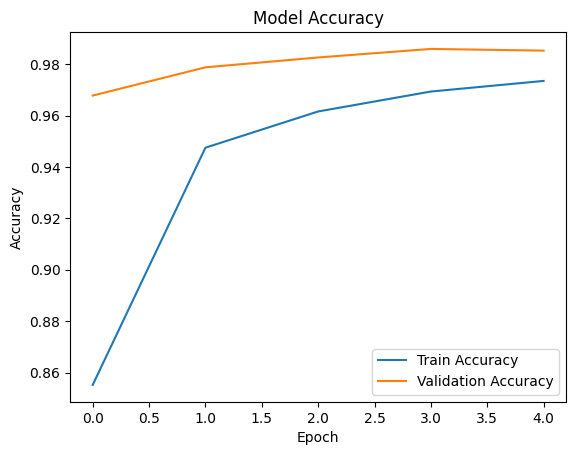

In [75]:
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [76]:
model.save('my_model.h5')  # Saves the entire model in HDF5 format


In [77]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.04972134530544281
Test accuracy: 0.9825999736785889


Conv2D layers at indices: [0, 2]


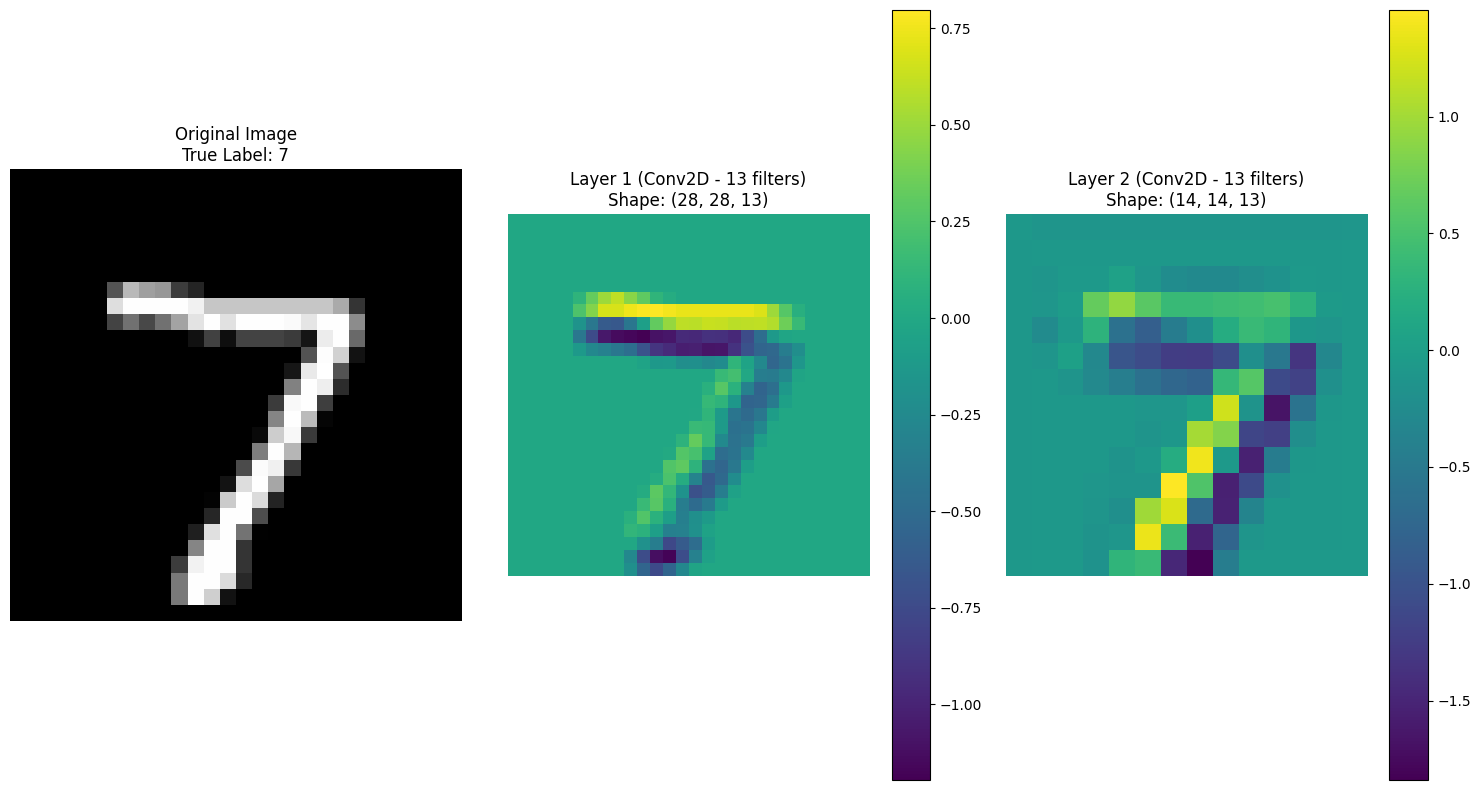

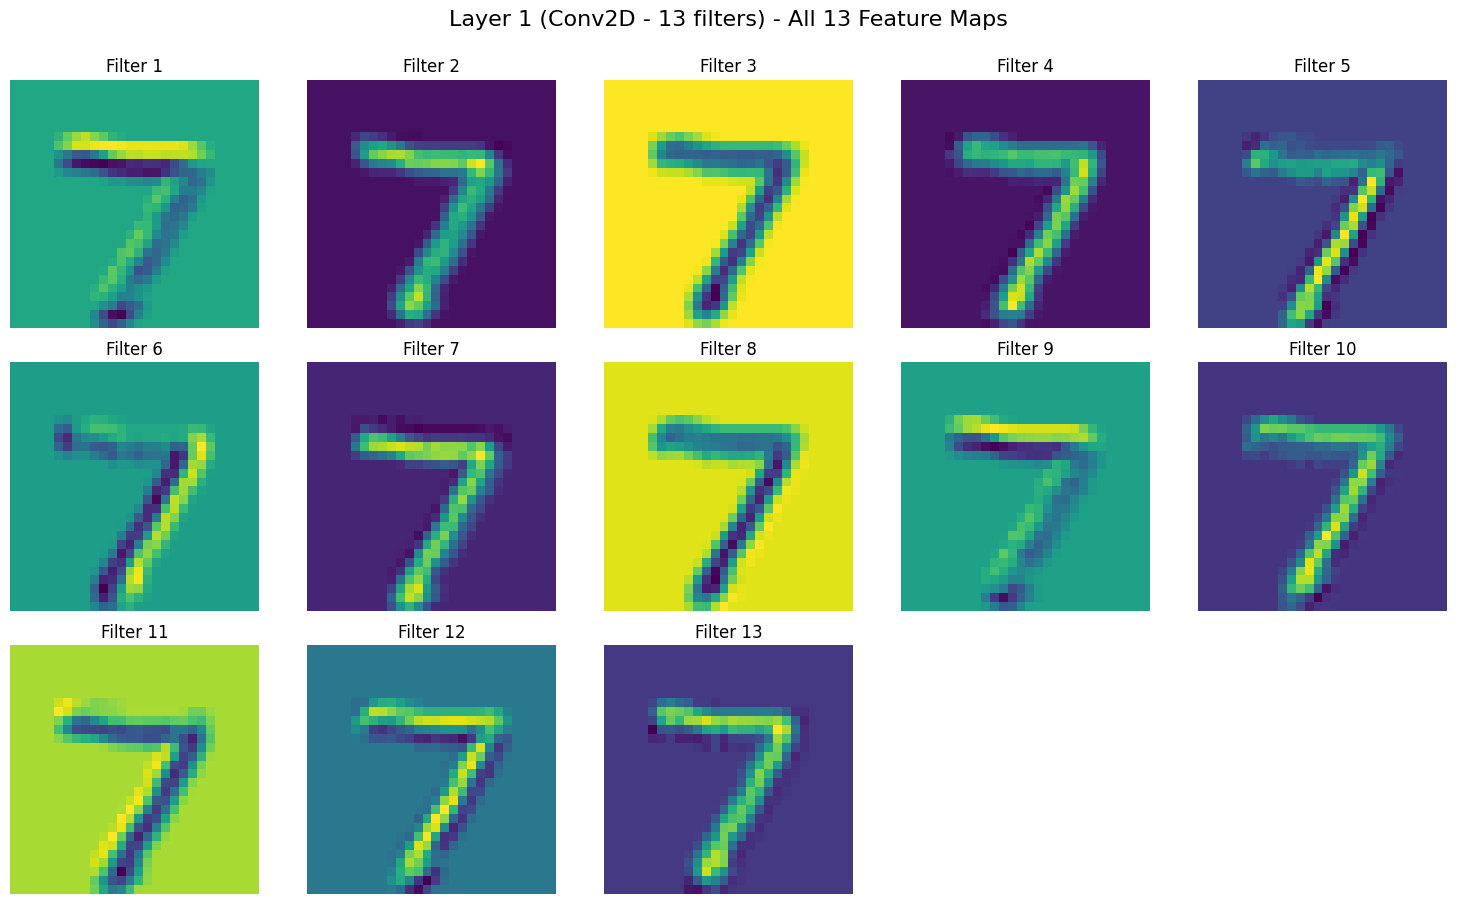

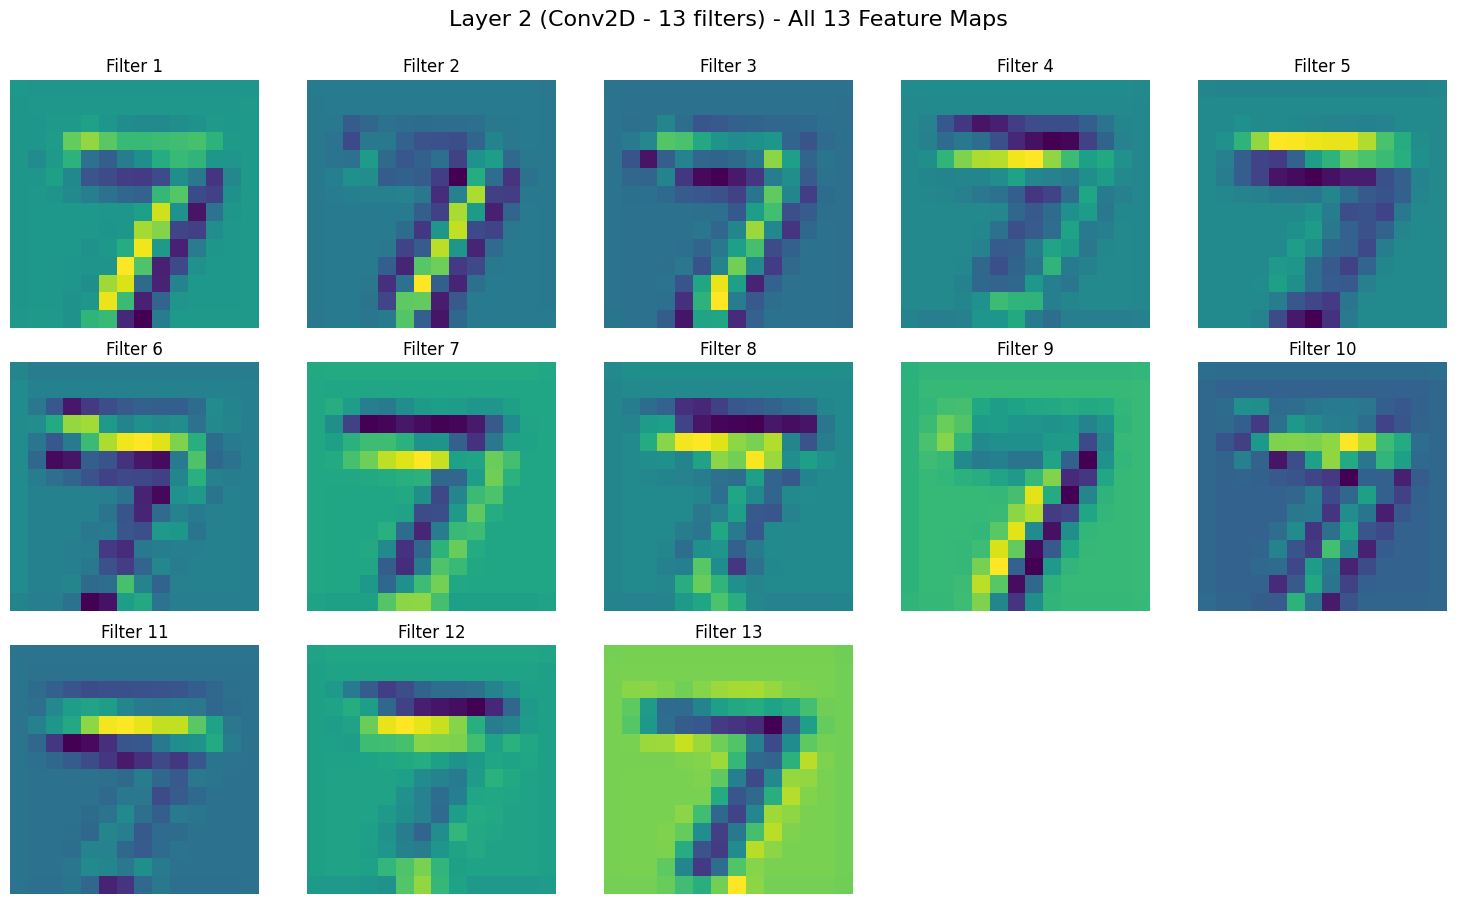


Visualizing feature maps for multiple images:


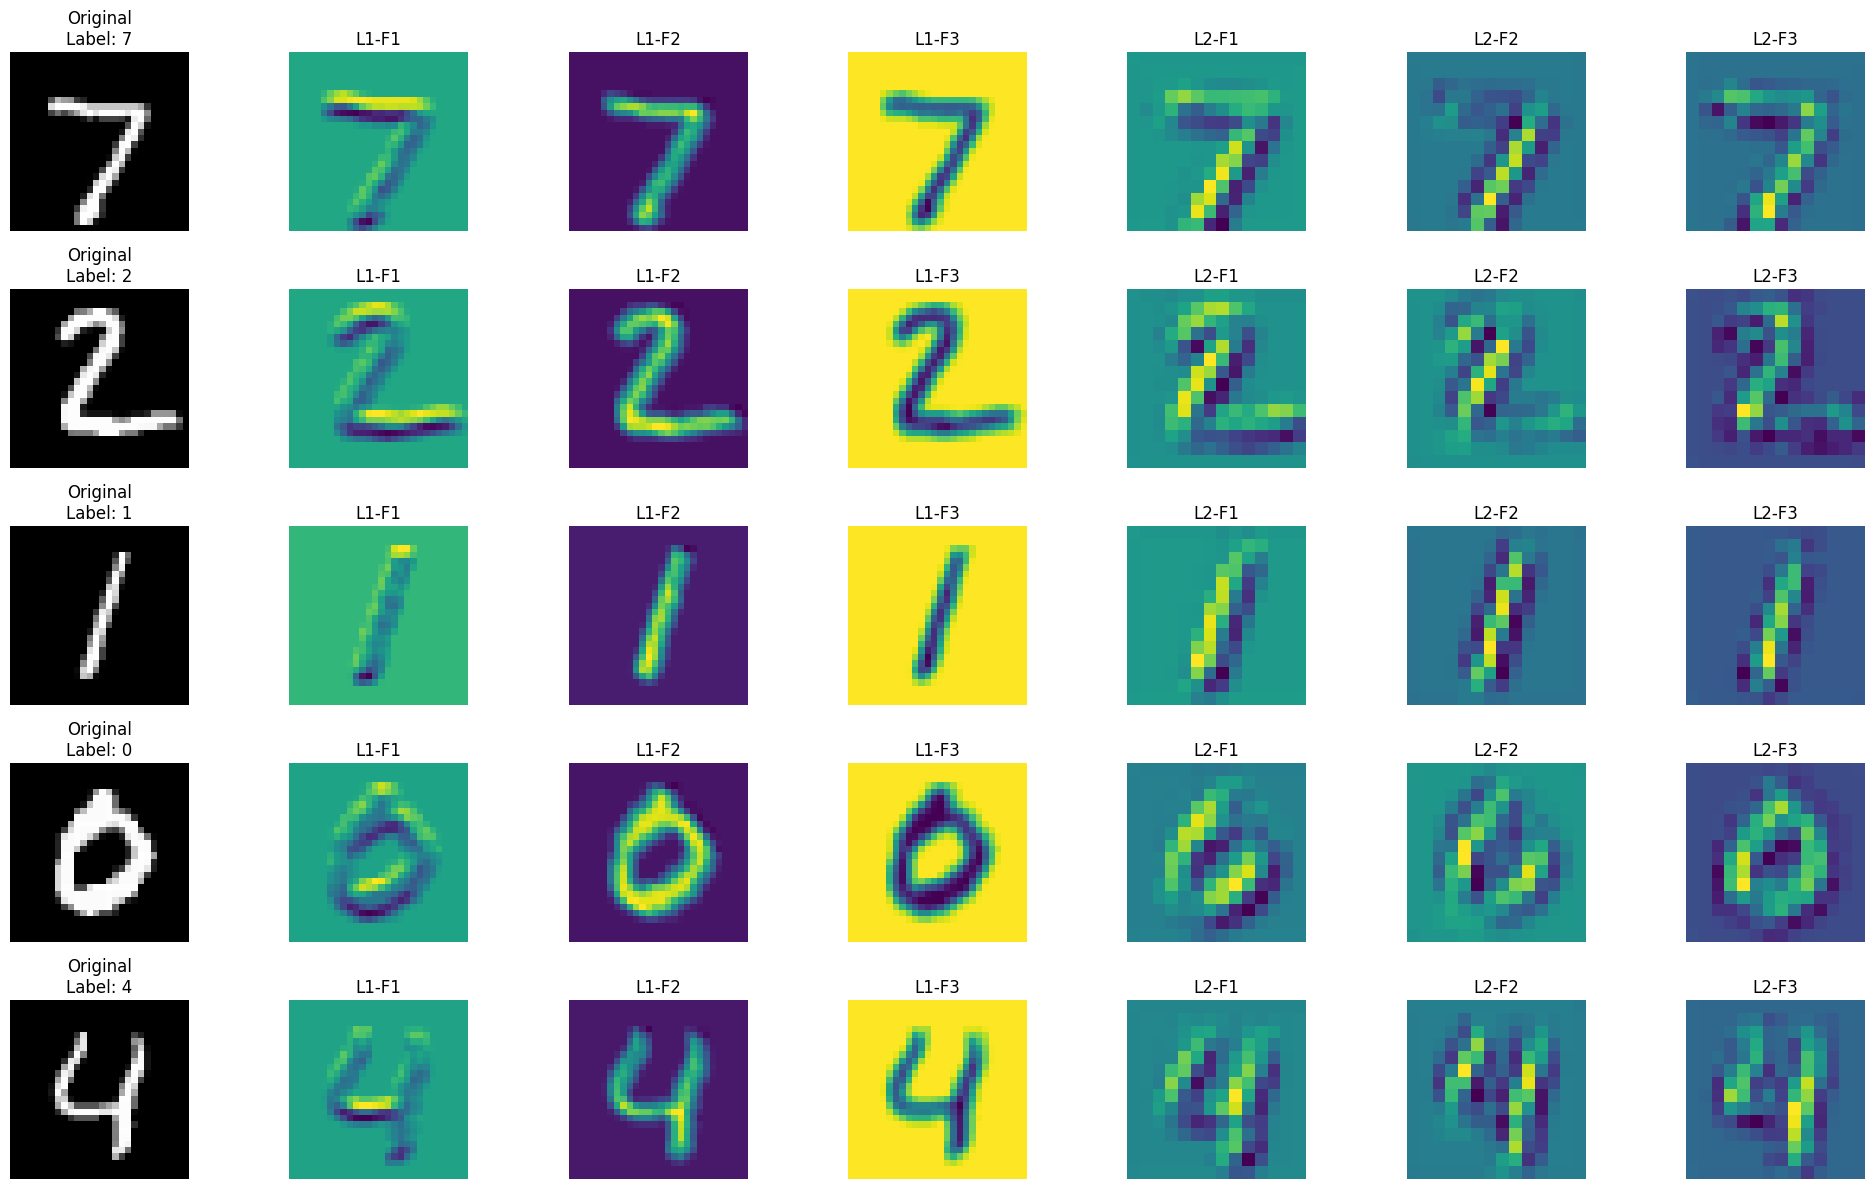

In [83]:
# Visualize feature maps for the two Conv2D layers
import matplotlib.pyplot as plt
import numpy as np

# Create a function to extract feature maps
def get_feature_maps(model, image, conv_layer_indices):
    """Extract feature maps from convolutional layers"""
    feature_maps = []
    x = image

    for i, layer in enumerate(model.layers):
        x = layer(x)
        if i in conv_layer_indices:
            feature_maps.append(x.numpy())

    return feature_maps

# Find Conv2D layer indices
conv_layer_indices = [i for i, layer in enumerate(model.layers) if isinstance(layer, Conv2D)]
print(f"Conv2D layers at indices: {conv_layer_indices}")

# Select a test image to visualize
img_index = 0  # You can change this to visualize different images
test_image = x_test[img_index:img_index+1]  # Keep batch dimension

# Get feature maps
feature_maps = get_feature_maps(model, test_image, conv_layer_indices)

# Display the original image
plt.figure(figsize=(15, 8))
plt.subplot(1, 3, 1)
plt.imshow(test_image[0, :, :, 0], cmap='gray')
plt.title(f'Original Image\nTrue Label: {np.argmax(y_test[img_index])}')
plt.axis('off')

# Visualize feature maps for each layer
layer_names = ['Layer 1 (Conv2D - 13 filters)', 'Layer 2 (Conv2D - 13 filters)']

for layer_idx, (feature_map, layer_name) in enumerate(zip(feature_maps, layer_names)):
    plt.subplot(1, 3, layer_idx + 2)

    # Display the feature map (showing first filter)
    plt.imshow(feature_map[0, :, :, 0], cmap='viridis')
    plt.title(f'{layer_name}\nShape: {feature_map.shape[1:]}')
    plt.axis('off')
    plt.colorbar()

plt.tight_layout()
plt.show()

# Detailed visualization: Show all filters for each layer
for layer_idx, (feature_map, layer_name) in enumerate(zip(feature_maps, layer_names)):
    n_filters = feature_map.shape[-1]

    # Create grid for all filters
    n_cols = 5
    n_rows = (n_filters + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
    fig.suptitle(f'{layer_name} - All {n_filters} Feature Maps', fontsize=16, y=1.00)

    axes = axes.flatten() if n_filters > 1 else [axes]

    for i in range(n_filters):
        axes[i].imshow(feature_map[0, :, :, i], cmap='viridis')
        axes[i].set_title(f'Filter {i+1}')
        axes[i].axis('off')

    # Hide unused subplots
    for i in range(n_filters, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Optional: Visualize multiple test images
print("\nVisualizing feature maps for multiple images:")
fig, axes = plt.subplots(5, 7, figsize=(20, 12))

for img_idx in range(5):
    test_image = x_test[img_idx:img_idx+1]
    feature_maps = get_feature_maps(model, test_image, conv_layer_indices)

    # Original image
    axes[img_idx, 0].imshow(test_image[0, :, :, 0], cmap='gray')
    axes[img_idx, 0].set_title(f'Original\nLabel: {np.argmax(y_test[img_idx])}')
    axes[img_idx, 0].axis('off')

    # Layer 1 feature maps (first 3 filters)
    for filter_idx in range(3):
        axes[img_idx, 1 + filter_idx].imshow(feature_maps[0][0, :, :, filter_idx], cmap='viridis')
        axes[img_idx, 1 + filter_idx].set_title(f'L1-F{filter_idx+1}')
        axes[img_idx, 1 + filter_idx].axis('off')

    # Layer 2 feature maps (first 3 filters)
    for filter_idx in range(3):
        axes[img_idx, 4 + filter_idx].imshow(feature_maps[1][0, :, :, filter_idx], cmap='viridis')
        axes[img_idx, 4 + filter_idx].set_title(f'L2-F{filter_idx+1}')
        axes[img_idx, 4 + filter_idx].axis('off')

plt.tight_layout()
plt.show()